https://microsoft.github.io/autogen/0.4.0.dev11/user-guide/agentchat-user-guide/quickstart.html


In [8]:
%pip install "autogen-agentchat==0.4.0.dev13" "autogen-ext[openai]==0.4.0.dev13" matplotlib azure-identity azure-ai-projects azure-ai-ml python-dotenv 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient

from dotenv import load_dotenv
import os

load_dotenv()

api_version = os.getenv("AZURE_OPENAI_API_VERSION")
api_key = os.getenv("AZURE_OPENAI_API_KEY")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
azure_openai_chat_completion_client = AzureOpenAIChatCompletionClient(
            model="gpt-4o",
            azure_endpoint=azure_endpoint,
            api_version=api_version,
            api_key=api_key,
        )

# Define a tool
async def get_weather(city: str) -> str:
    return f"The weather in {city} is 73 degrees and Sunny."


async def main() -> None:
    # Define an agent
    weather_agent = AssistantAgent(
        name="weather_agent",
        model_client=azure_openai_chat_completion_client,
        tools=[get_weather],
    )

    # Define a team with a single agent and maximum auto-gen turns of 1.
    agent_team = RoundRobinGroupChat([weather_agent], max_turns=1)

    while True:
        # Get user input from the console.
        user_input = input("Enter a message (type 'exit' to leave): ")
        if user_input.strip().lower() == "exit":
            break
        # Run the team and stream messages to the console.
        stream = agent_team.run_stream(task=user_input)
        await Console(stream)


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

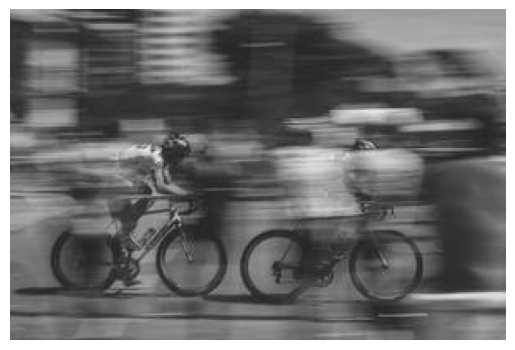

[]
source='assistant' models_usage=RequestUsage(prompt_tokens=238, completion_tokens=60) content='The image appears to be a black and white photo capturing two cyclists in motion. The photo is slightly blurred, emphasizing the speed and dynamic nature of the scene. The background also appears to be blurred, likely showing a cityscape with buildings and other elements, further accentuating the movement of the cyclists.' type='TextMessage'


In [5]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import CancellationToken
from autogen_core import Image as AGImage
from PIL import Image
import matplotlib.pyplot as plt

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
plt.imshow(pil_image) 
plt.axis('off') 
plt.show()

agent = AssistantAgent(
    name="assistant",
    model_client=azure_openai_chat_completion_client,
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [multi_modal_message],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)



# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

In [6]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient


# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = azure_openai_chat_completion_client
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=15), content=[FunctionCall(id='call_Oe0kXR8JV1PditFEFoaKiabV', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_Oe0kXR8JV1PditFEFoaKiabV')], type='ToolCallExecutionEvent')]
source='assistant' models_usage=None content='AutoGen is a programming framework for building multi-agent applications.' type='ToolCallSummaryMessage'


In [ ]:
from autogen_agentchat.agents import UserProxyAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

async def user_proxy_run() -> None:
    user_proxy_agent = UserProxyAgent("user_proxy")
    response = await user_proxy_agent.on_messages(
        [TextMessage(content="What is your name? ", source="user")], cancellation_token=CancellationToken()
    )
    print(f"Your name is {response.chat_message.content}")


# Use asyncio.run(user_proxy_run()) when running in a script.
await user_proxy_run()

In [7]:
from autogen_agentchat.ui import Console


async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        )
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- assistant ----------
[FunctionCall(id='call_kVLUSfHM8KAoW9fCatvFsBEZ', arguments='{"query":"AutoGen framework"}', name='web_search')]
[Prompt tokens: 108, Completion tokens: 16]
---------- assistant ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_kVLUSfHM8KAoW9fCatvFsBEZ')]
---------- assistant ----------
AutoGen is a programming framework for building multi-agent applications.
---------- Summary ----------
Number of inner messages: 2
Total prompt tokens: 108
Total completion tokens: 16
Duration: 1.17 seconds
